# Agenda, week 5: Visualization

1. Q&A
2. Plotting in Python and with data
3. Line plots
4. Bar plots
5. Histograms
6. Pie plots
7. Scatter plots
8. Box plots
9. What's next?

# Plotting

When we plot, we're doing two things:

1. We're making our data more understandable to people who are new to it, and have to understand it,
2. We're making our data more understandable to *ourselves*!

How can I create plots?

The best-known library for plotting in Python is known as Matplotlib. (You can learn more at https://matplotlib.org/.) It's very powerful, open source, has been around for a while... and is VERY HARD TO LEARN, in my opinion.

Today, we are not going to be using Matplotlib... at least, not directly. Pandas has a plotting interface (i.e., it has methods and options) which are then translated into Matplotlib plots. Using Pandas, we can create plots with Matplotlib, but with a much simpler interface.

There are some other libraries that are gaining traction, and also wrap themselves around Matplotlib. One of the best known is Seaborn. You can also look at Plotly, which is (I think) a combination of Matplotlib and JavaScript, for Web pages.

# How can we plot with Pandas?

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

<Axes: >

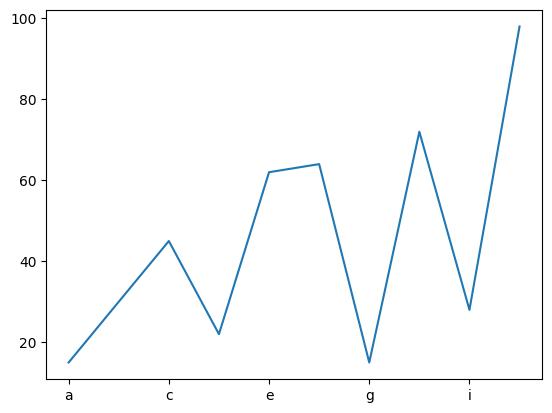

In [4]:
s = Series(np.random.randint(0, 100, 10),
          index=list('abcdefghij'))

s.plot.line()   # notice: series.plot.TYPE_OF_PLOT()

# Plots appear inside of Jupyter!

Now we can see that Jupyter can include:

- Code
- Data that the code analyzes
- Plots that are part of our analysis

If you find that the plots are not appearing inside of Jupyter, try the following magic command:

    %matplotlib inline
    
If you run that in a code cell by itself, then plots should show up inside of Jupyter. (Normally, I don't have to write this.)    

When we run `s.plot.line()`, Pandas creates a line plot:

- The x axis is based on our index (i.e., the names we gave to the rows)
- The y axis is based on the values
- Not all of the index values are displayed

We can pass a variety of keyword arguments to `plot.line` to customize our plot a bit.

<Axes: title={'center': 'My amazing plot'}>

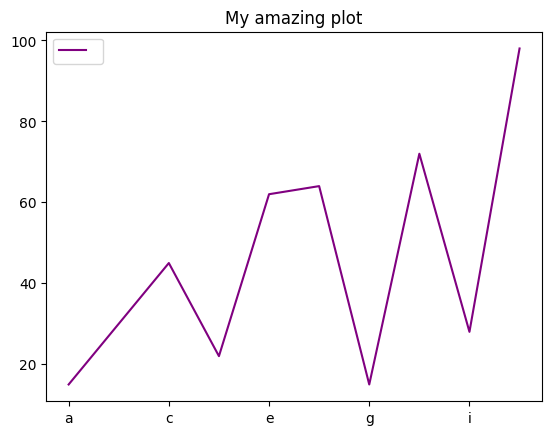

In [6]:
s.plot.line(title='My amazing plot', color='purple', legend=True)

In [7]:
# what if I want to plot a data frame?
# remember, each column in a data frame is a series

df = DataFrame({'a':[10, 20, 30, 40, 50],
               'b':[15, -5, 20, -10, 30]},
              index=list('vwxyz'))
df

,a,b
v,10,15
w,20,-5
x,30,20
y,40,-10
z,50,30


<Axes: >

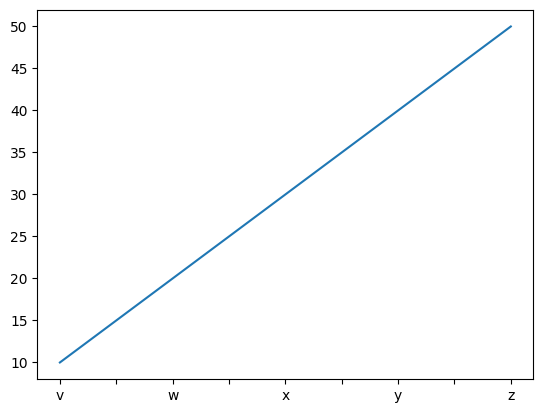

In [8]:
# what if I want to plot column a?
df['a'].plot.line()

<Axes: >

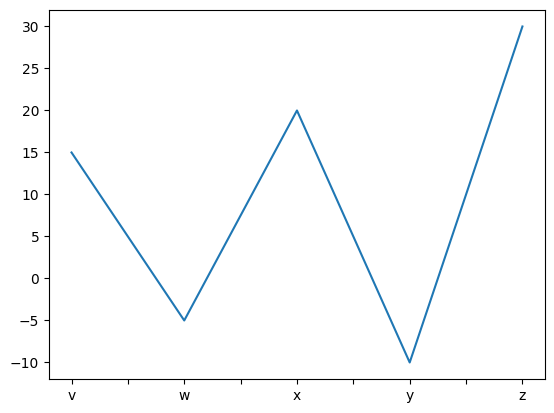

In [9]:
# plot column b?
df['b'].plot.line()

<Axes: >

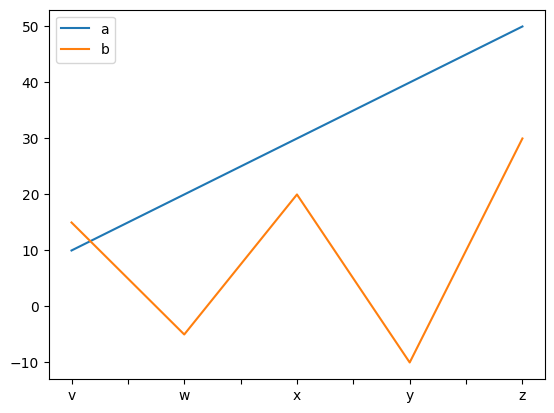

In [10]:
# what if I want to plot both of them?
# remember the rule of thumb for data frames: We can often run series methods
# on data frames. In such cases, the method is run on each of the columns, as a separate series

df.plot.line()

<Axes: >

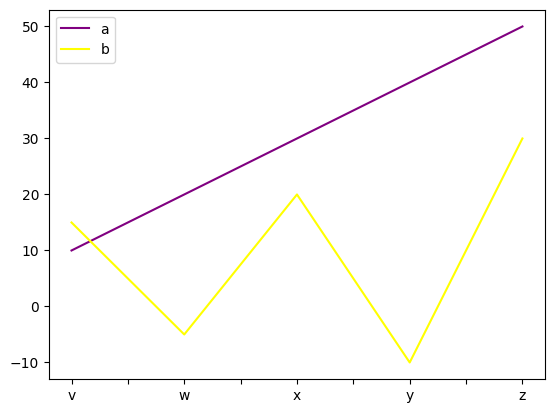

In [12]:
df.plot.line(color=['purple', 'yellow'])

<Axes: >

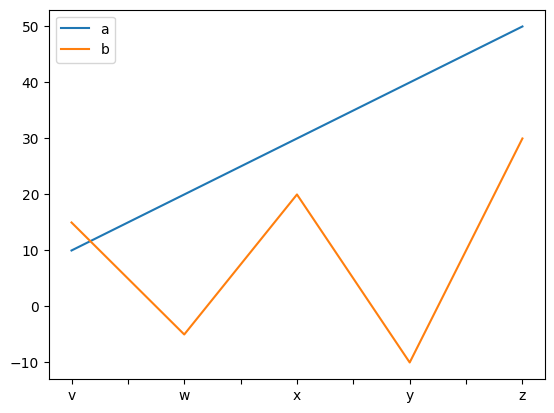

In [13]:
df[ ['a', 'b'] ].plot.line()  # select columns using fancy indexing

# Exercise: Weather plotting

1. Create a data frame with three columns for high temp, low temp, and precipitation. The index should be the days or dates over the next 10 days.  We're going to put together a data frame with the 10-day forecast.
2. Create a line plot for all three columns.
3. Create a line plot just for the high and low temps.

In [14]:
# create a data frame as a dict of lists
# each dict key is a column name, and each dict value is a list of numbers.

df = DataFrame({'high': [30, 35, 34, 30, 29, 29, 31, 31, 30],
                'low': [19, 25, 20, 18, 17, 18, 19, 19, 19],
               'precip':[0, 0, 0, 0, 0, 0, 0, 0, 0]})
df

,high,low,precip
0,30,19,0
1,35,25,0
2,34,20,0
3,30,18,0
4,29,17,0
5,29,18,0
6,31,19,0
7,31,19,0
8,30,19,0


<Axes: title={'center': '10-day forecast in Modiin'}>

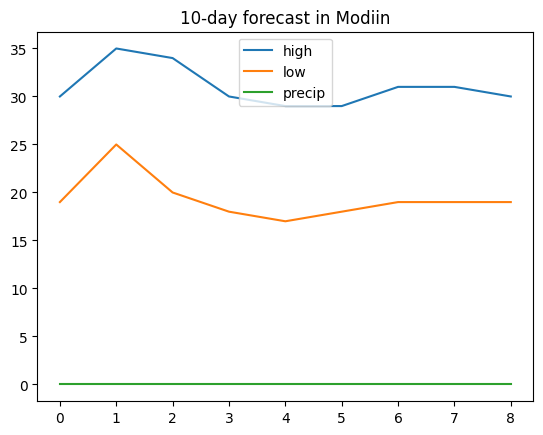

In [16]:
# create a line plot for all three
df.plot.line(title='10-day forecast in Modiin')

<Axes: >

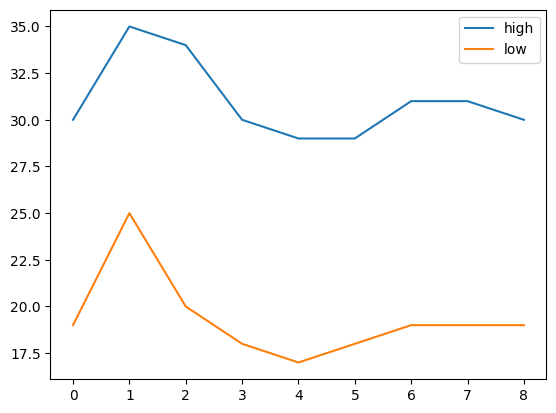

In [17]:
# only high and low temps

df[['high', 'low']].plot.line()

In [18]:
# create a data frame as a dict of lists
# each dict key is a column name, and each dict value is a list of numbers.

df = DataFrame({'high': [30, 35, 34, 30, 29, 29, 31, 31, 30],
                'low': [19, 25, 20, 18, 17, 18, 19, 19, 19],
               'precip':[0, 0, 0, 0, 0, 0, 0, 0, 0]},
              index='Wed Thu Fri Sat Sun Mon Tue Wed Thu'.split())
df

,high,low,precip
Wed,30,19,0
Thu,35,25,0
Fri,34,20,0
Sat,30,18,0
Sun,29,17,0
Mon,29,18,0
Tue,31,19,0
Wed,31,19,0
Thu,30,19,0


<Axes: >

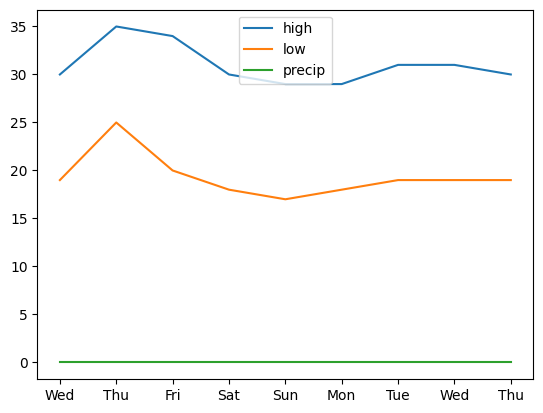

In [19]:
df.plot.line()

# Bar plots 

In a line plot, we have the individual points plotted, and the lines join them together so that we can see the trend. In a bar plot, we have a bar from the x axis up to the point that we're drawing. This allows us to compare distinct values more easily.

Note that if you have a large number of values, then both line plots and bar plots will give you trouble. 

<Axes: >

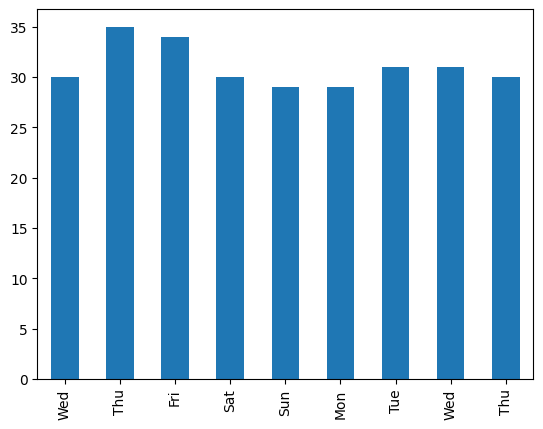

In [20]:
df['high'].plot.bar()  

<Axes: >

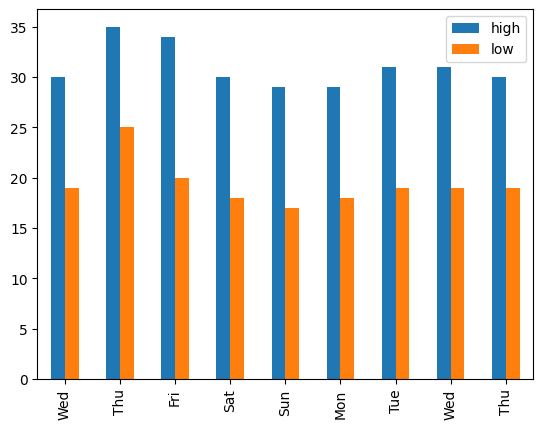

In [21]:
# what if I plot both of the columns? 

df[['high', 'low']].plot.bar()

<Axes: >

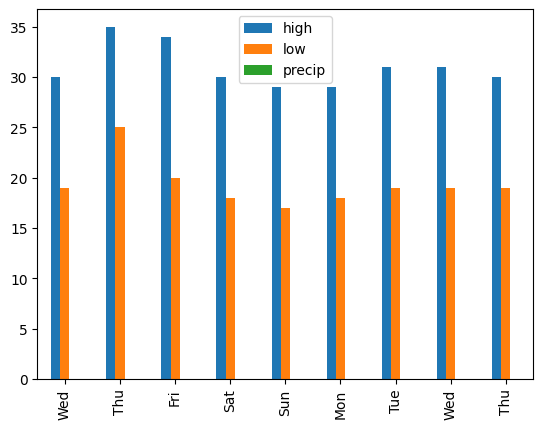

In [22]:
df.plot.bar()

<Axes: >

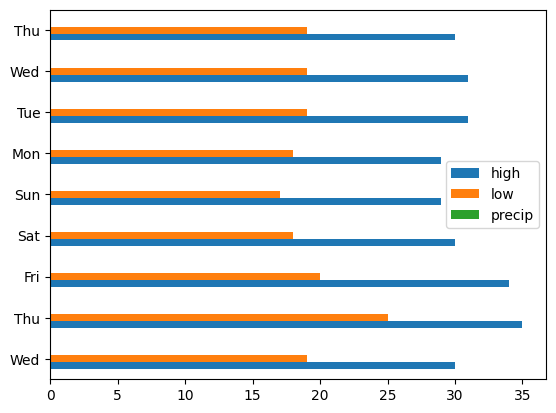

In [23]:
# sometimes, it's nicer to get the bar plot horizontal rather than vertical
# in such cases, we can use "barh"

df.plot.barh()

My problem with `barh` plots is that they (very logically) have the first values (i.e., the earliest indexes) at the *bottom* of the plot, and the latest indexes at the *top*. 

# Exercise: Taxi bar plots

1. Load our favorite `taxi.csv` file. We're only interested (for now) in `trip_distance` and `total_amount`.
2. Create a bar plot with both of these columns for the first 20 rides in the data frame.
3. Create a horizontal bar plot with both columns for the 20 longest rides in the data frame.

In [24]:
df = pd.read_csv('taxi.csv',
                usecols=['trip_distance', 'total_amount'])
df

,trip_distance,total_amount
0,1.63,17.80
1,0.46,8.30
2,0.87,11.00
3,2.13,17.16
4,1.40,10.30
...,...,...
9994,2.70,12.30
9995,4.50,20.30
9996,5.59,22.30
9997,1.54,7.80


In [25]:
# Create a bar plot with both of these columns for the first 20 rides in the data frame.

df.loc[:20]

,trip_distance,total_amount
0,1.63,17.80
1,0.46,8.30
2,0.87,11.00
3,2.13,17.16
4,1.40,10.30
...,...,...
16,1.41,15.36
17,0.70,8.80
18,1.90,19.12
19,1.10,7.30
